<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/bgsedsc_0.jpg">

# Data analysis in R with data.table library

<img src="https://www.r-project.org/Rlogo.png">

Data.table is an alternative library to *dplyr*, and its main advantage is speed. In particular, when doing merges (joins) and when reading data. In general, for small datasets the difference may not be relevant, but it is whenever you deal with datasets from hundreds of Mb.

*data.table* is an R package that provides an enhanced version of data.frames, which are the standard data structure for storing data in base R. Most standard R methods to manage *data.frames* also work with *data.tables*, but it's better to use the specific data.tables methods.

Main disadvanges is that the syntax is less intuitive than *dplyr*.

You can follow the official [*vignette* of data.table](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html) for an alternative introduction. A complete [cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/datatable.pdf) is also available online.

In [1]:
if (!require('data.table')) install.packages("data.table")

Loading required package: data.table

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘data.table’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(data.table)

## Load data

To have a fair comparison with dplyr, we will follow the same structure and the same benchmark dataset, containing air pollution and temperature data for the city of Chicago in the U.S.

https://www.machinelearningplus.com/data-manipulation/datatable-in-r-complete-guide/

https://wetlandscapes.com/blog/a-comparison-of-r-dialects/#imperitive-programming-and-the-for-loop

In [3]:
# We will be using a dataset containing air pollution and temperature data for the city of Chicago in the U.S.
chicago <- readRDS(url("https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/chicago","rb"))
chicago<-as.data.table(chicago)
dim(chicago)
head(chicago)

[1] 6940    8

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


In this case this is a RDS format which is specific for R. In case you have a text file (e.g. csv), please use data.table function `fread`, which is really fast (`fwrite` to save results).

In [4]:
# sample load of csv file
data<- fread("https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/housing.csv")
head(data)


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## Generating a data.table

Alternative ways:
+ Importing: If you use `fread`, you will have already imported the data into a data.table. 
+ Creating: use `data.table()`
+ Converting: If you have a standard data.frame, you can turn it into a data.table using `as.data.table()`.

In [5]:
# From fread
print(class(data))
# from scratch
data2<-data.table(field1=rnorm(10),field2=rnorm(10))
head(data2)
class(data2)

[1] "data.table" "data.frame"


field1,field2
<dbl>,<dbl>
-0.20426567,1.3507489
-0.49863939,0.8756081
-0.15086709,1.3331214
0.48202875,0.9908307
0.08354319,0.2154530
-0.25351191,-1.1662918


[1] "data.table" "data.frame"

In [6]:
data3<-as.data.frame(data2)
print(class(data3))
data3<-as.data.table(data3)
print(class(data3))

[1] "data.frame"
[1] "data.table" "data.frame"


## General syntax

General syntax of an operation on a data.table named DT is `DT[i, j, by]` which means:
+ *i*: subset/reorder rows using i
+ *j*: calculate j formula (and assign to some columns)
+ *by*: do the operation grouped by unique values of certain columns

## Subset rows or columns

The `select()` function can be used to select columns of a data frame that we want to focus on.

In [7]:
# filter rows by certain criteria
head(chicago[tmpd>30 & !is.na(pm25tmean2)])

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
chic,48,46.7,1998-01-05,11.50,20.61538,2.800011,20.91607
chic,37,30.6,1998-01-29,21.40,30.16667,3.097222,30.31667
chic,32,25.6,1998-02-04,13.90,12.76923,24.738527,14.08442
chic,39,33.9,1998-02-10,29.50,62.84615,4.977657,36.24163
chic,42,35.3,1998-02-16,22.55,33.69231,11.430556,22.21667
chic,44,35.0,1998-02-22,27.75,39.07692,11.833333,23.30000


In [8]:
# filter by rownumber
chicago[c(3,6:10)]
# similar by column number will be 
head(chicago[,c(1,4:6)])

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233
chic,34.5,26.750,1987-01-07,NA,41.00000,9.291667,20.58171
chic,29.0,22.000,1987-01-08,NA,36.00000,11.291667,17.03723
chic,26.5,29.000,1987-01-09,NA,33.28571,4.500000,23.38889
chic,32.5,27.750,1987-01-10,NA,NA,4.958333,19.54167


city,date,pm25tmean2,pm10tmean2
<chr>,<date>,<dbl>,<dbl>
chic,1987-01-01,NA,34.00000
chic,1987-01-02,NA,NA
chic,1987-01-03,NA,34.16667
chic,1987-01-04,NA,47.00000
chic,1987-01-05,NA,NA
chic,1987-01-06,NA,48.00000


In [9]:
# subset by a list of columns
head(chicago[,.(city, date, tmpd)])
# alternatively, if you define dynamically those fields
filter<-c('city', 'date','tmpd')
head(chicago[,c(filter)])

city,date,tmpd
<chr>,<date>,<dbl>
chic,1987-01-01,31.5
chic,1987-01-02,33.0
chic,1987-01-03,33.0
chic,1987-01-04,29.0
chic,1987-01-05,32.0
chic,1987-01-06,40.0


[1] "city" "date" "tmpd"

In [10]:
# order by certain columns (sequence implies priority, note the - sign to do decreasing order)
head(chicago[order(tmpd, -date)])

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
chic,-16.0,-25.625,1994-01-18,NA,27.00000,14.656250,22.10236
chic,-12.0,-18.875,1996-02-03,NA,25.61538,7.736111,30.13542
chic,-10.5,-21.000,1996-02-02,NA,35.00000,9.555556,31.47917
chic,-10.5,-23.125,1994-01-15,NA,36.00000,12.010417,24.70139
chic,-8.0,-2.375,1994-01-19,NA,24.50000,4.864583,36.59796
chic,-6.5,-23.000,1989-12-21,NA,49.00000,16.666667,19.50000


In [11]:
# drop some columns (dynamically defined if needed)
head(chicago[,!c(filter), with=FALSE]) # also works with '-' instead of '!'


dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31.500,NA,34.00000,4.250000,19.98810
29.875,NA,NA,3.304348,23.19099
27.375,NA,34.16667,3.333333,23.81548
28.625,NA,47.00000,4.375000,30.43452
28.875,NA,NA,4.750000,30.33333
35.125,NA,48.00000,5.833333,25.77233


## Rename columns

Use `setnames(dt, old, new)` function.

In [12]:
# Here we see the names of the first five variables in the chicago data frame.
setnames(chicago, c('city','tmpd'),c('town','temp'))
colnames(chicago)

[1] "town"       "temp"       "dptp"       "date"       "pm25tmean2"
[6] "pm10tmean2" "o3tmean2"   "no2tmean2"

## Compute new columns
Main hint is to use ':=' for a single new column, and '':='(x=..., y=..., ...) for several columns. Note that, when you don't assign to a new variable, the old variable is transformed.

To remove columns, set to NULL.

In [13]:
chicago_mutated <- chicago[, pm25detrend := pm25tmean2 - mean(pm25tmean2, na.rm = TRUE)] 
# if you don't add na.rm=TRUE, mean value would be NA
head(chicago_mutated)


town,temp,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,NA
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,NA
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,NA
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,NA
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,NA


In [14]:
chicago_mutated2 <- chicago[, ':='(pm25detrend = pm25tmean2 - mean(pm25tmean2, na.rm = TRUE),
                            pm25_sd =sd(pm25tmean2,na.rm=TRUE)
                            )]
head(chicago_mutated2)


town,temp,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,pm25_sd
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,NA,8.69775
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA,8.69775
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,NA,8.69775
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,NA,8.69775
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,NA,8.69775
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,NA,8.69775


In [15]:
# If I just want to yield my new columns...
chicago_mutated3 <- chicago[, .(pm25detrend = pm25tmean2 - mean(pm25tmean2, na.rm = TRUE),
                            pm25_sd =sd(pm25tmean2,na.rm=TRUE)
                            )]
head(chicago_mutated3)

pm25detrend,pm25_sd
<dbl>,<dbl>
NA,8.69775
NA,8.69775
NA,8.69775
NA,8.69775
NA,8.69775
NA,8.69775


In [16]:
# if I want a dynamic name for the new column
new_name='my_col'
chicago_mutated4 <- chicago[, (new_name) := pm25tmean2 - mean(pm25tmean2, na.rm = TRUE)] 
# if you don't add na.rm=TRUE, mean value would be NA
head(chicago_mutated4)
colnames(chicago)

town,temp,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,pm25_sd,my_col
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,NA,8.69775,NA
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA,8.69775,NA
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,NA,8.69775,NA
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,NA,8.69775,NA
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,NA,8.69775,NA
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,NA,8.69775,NA


[1] "town"        "temp"        "dptp"        "date"        "pm25tmean2" 
 [6] "pm10tmean2"  "o3tmean2"    "no2tmean2"   "pm25detrend" "pm25_sd"    
[11] "my_col"

In [17]:
# Remove some columns now
chicago_remove<-copy(chicago_mutated)
chicago_remove[,c('pm25detrend','date'):=NULL]
head(chicago_remove)
colnames(chicago_mutated)

town,temp,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25_sd,my_col
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,NA,34.00000,4.250000,19.98810,8.69775,NA
chic,33.0,29.875,NA,NA,3.304348,23.19099,8.69775,NA
chic,33.0,27.375,NA,34.16667,3.333333,23.81548,8.69775,NA
chic,29.0,28.625,NA,47.00000,4.375000,30.43452,8.69775,NA
chic,32.0,28.875,NA,NA,4.750000,30.33333,8.69775,NA
chic,40.0,35.125,NA,48.00000,5.833333,25.77233,8.69775,NA


[1] "town"        "temp"        "dptp"        "date"        "pm25tmean2" 
 [6] "pm10tmean2"  "o3tmean2"    "no2tmean2"   "pm25detrend" "pm25_sd"    
[11] "my_col"

## Grouping

Basically use the third slot of a dt[1st,2nd,3rd] structure, which is a 'by'.

In [18]:
# For example, we might want to know what the average annual level of PM2.5 is. 
# The stratum is the year and that is something we can derive from the date variable.

# First, we can create a year varible using as.POSIXlt().
# alternatively, for dates explore library lubridate
chicago[, year := as.POSIXlt(date)$year + 1900]
head(chicago)


chicago[,.(avg_pm25=mean(pm25tmean2,na.rm=TRUE),
          avg_temp=mean(temp, na.rm=TRUE),
          median_temp=median(temp, na.rm=TRUE)), by=.(year)]

town,temp,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,pm25_sd,my_col,year
<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,NA,8.69775,NA,1987
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA,8.69775,NA,1987
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,NA,8.69775,NA,1987
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,NA,8.69775,NA,1987
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,NA,8.69775,NA,1987
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,NA,8.69775,NA,1987


year,avg_pm25,avg_temp,median_temp
<dbl>,<dbl>,<dbl>,<dbl>
1987,NaN,52.12603,51.00
1988,NaN,49.93579,49.25
1989,NaN,48.36712,50.50
1990,NaN,51.67260,52.00
1991,NaN,51.40274,50.50
1992,NaN,48.81148,48.75
1993,NaN,48.71918,48.50
1994,NaN,50.08219,52.00
1995,NaN,50.20959,49.50


## Join operations

One can distinguish two types when trying to combine two data tables df1 and df2 based on some common fields.

Main structure is `merge(x,y,by=c('common_field1','common_field2'))`, check the [documentation](https://www.rdocumentation.org/packages/data.table/versions/1.12.8/topics/merge( for details.

<img src="https://i.stack.imgur.com/hMKKt.jpg">

### Mutating joins

Add columns to df1 using matches in df2.

+ inner: use parameter all=False
+ left: use parameter all.x=True
+ right: use paraemter all.y=True
+ full join: use parameter all=True


In [19]:
# Let's practice by creating before a second data frame with a common field
# Adding Celsius degrees to some values
df2=data.table(temp=c(seq(20,50)))
df2$celsius= (df2$temp-32)* 5 / 9  # standard way of creating fields also works for data.tables
head(df2)

temp,celsius
<int>,<dbl>
20,-6.666667
21,-6.111111
22,-5.555556
23,-5.000000
24,-4.444444
25,-3.888889


In [20]:
# I only want chicago data with the range of temperatures that I have in df2, including the Celsius equivalent
ex1<- merge(chicago, df2, all= F,by=c('temp'))
print(nrow(ex1))
print(nrow(chicago))
head(ex1)

[1] 2073
[1] 6940


temp,town,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,pm25_sd,my_col,year,celsius
<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,chic,5.000,1989-12-03,NA,14.0,20.250000,14.38542,NA,8.69775,NA,1989,-6.666667
20,chic,-1.625,1991-11-07,NA,30.0,6.458333,22.96788,NA,8.69775,NA,1991,-6.666667
20,chic,19.625,1993-02-28,NA,44.5,28.444444,46.23249,NA,8.69775,NA,1993,-6.666667
20,chic,16.500,1995-01-22,NA,19.0,8.472222,24.59375,NA,8.69775,NA,1995,-6.666667
20,chic,14.250,1995-01-23,NA,24.5,3.750000,33.15625,NA,8.69775,NA,1995,-6.666667
20,chic,3.500,1995-02-04,NA,17.0,18.687500,16.34375,NA,8.69775,NA,1995,-6.666667


In [21]:
# I want to add the Celsius equivalent to my chicago data using the df2 mapping. Keep all rows in chicago file
# just add NA if we don't have the mapping temperature
ex2<- merge(chicago, df2,all.x=T,by=c('temp'))
print(nrow(chicago))
print(nrow(ex2))
head(ex2)

[1] 6940
[1] 6940


temp,town,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,pm25_sd,my_col,year,celsius
<dbl>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,chic,22.900,2003-03-01,47.7375,47.50000,9.416667,37.44444,31.50654,8.69775,31.50654,2003,NA
-16.0,chic,-25.625,1994-01-18,NA,27.00000,14.656250,22.10236,NA,8.69775,NA,1994,NA
-12.0,chic,-18.875,1996-02-03,NA,25.61538,7.736111,30.13542,NA,8.69775,NA,1996,NA
-10.5,chic,-23.125,1994-01-15,NA,36.00000,12.010417,24.70139,NA,8.69775,NA,1994,NA
-10.5,chic,-21.000,1996-02-02,NA,35.00000,9.555556,31.47917,NA,8.69775,NA,1996,NA
-8.0,chic,-2.375,1994-01-19,NA,24.50000,4.864583,36.59796,NA,8.69775,NA,1994,NA


## Pipeline operations `[]`

In data.table, if you want to pipeline operations it's simply a matter of adding `[]`in one row

`dt[i,j][,k,b][l]`

In [22]:
# Let's compute the max pollutant level by month. and remove NAs if any
chicago[,month := as.POSIXlt(date)$mon + 1][,.(max_pm25=max(pm25tmean2,na.rm=TRUE),
          max_O3=max(o3tmean2, na.rm=TRUE),
          max_no2=max(no2tmean2, na.rm=TRUE)), by=.(month)][!is.na( max_pm25) &
                                            !is.na(max_O3) & !is.na(max_no2)]


month,max_pm25,max_O3,max_no2
<dbl>,<dbl>,<dbl>,<dbl>
1,49.47143,28.22222,52.44697
2,61.50000,37.37500,57.56439
3,47.73750,39.05000,53.89485
4,46.70000,47.94907,57.52542
5,56.50000,52.75000,51.28535
6,51.53750,66.58750,52.20833
7,41.40000,59.54167,62.47998
8,44.48750,53.96701,55.90522
9,56.50000,57.48864,53.13333


## Reshaping data.tables

Reshaping or pivoting data.tables is useful depending on the type of operations, even for plotting.
Some times 'long' format is preferred, sometimes 'wide' format is preferred.

`melt` and `dcast` functions are fast an efficient for this purpose. Have a look at this excellent explanatory [vignette](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-reshape.html).

`dcast` syntax is the most complex because it uses formulas with a `~` symbol as separator, have a look at the example.

In [23]:
# Report chicaco data by month and year
report_chicago<- chicago[,':='(month = as.POSIXlt(date)$mon + 1,
                                year= as.POSIXlt(date)$year + 1900)][,.(max_pm25=max(pm25tmean2,na.rm=TRUE),
          max_O3=max(o3tmean2, na.rm=TRUE),
          max_no2=max(no2tmean2, na.rm=TRUE)), by=.(month,year)]
head(report_chicago)

Warning message in gmax(pm25tmean2, na.rm = TRUE):
“No non-missing values found in at least one group. Returning '-Inf' for such groups to be consistent with base”


month,year,max_pm25,max_O3,max_no2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1987,-Inf,17.54167,38.06142
2,1987,-Inf,28.10417,51.25325
3,1987,-Inf,38.20833,47.16999
4,1987,-Inf,41.39062,57.52542
5,1987,-Inf,50.44814,51.28535
6,1987,-Inf,62.96966,51.17500


In [24]:
# Replace -Inf by NA
report_chicago[is.infinite(max_pm25),max_pm25:=NA]
head(report_chicago)

month,year,max_pm25,max_O3,max_no2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1987,NA,17.54167,38.06142
2,1987,NA,28.10417,51.25325
3,1987,NA,38.20833,47.16999
4,1987,NA,41.39062,57.52542
5,1987,NA,50.44814,51.28535
6,1987,NA,62.96966,51.17500


We will focus only on max_no2 data...

In [25]:
# Reshape to have one column per month: to wide = use dcast
# Note that we have to use formula notation. Left hand side indicate columns to keep, 
# right hand side column to pivot to column names, and value.var the baseline data to widen
wide_report<-dcast(report_chicago, year ~ month, value.var = "max_no2")
head(wide_report)

year,1,2,3,4,5,6,7,8,9,10,11,12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1987,38.06142,51.25325,47.16999,57.52542,51.28535,51.17500,36.62801,36.48219,37.31723,43.20833,36.91667,31.69066
1988,52.10000,49.01894,44.02778,39.93429,39.35218,44.59664,62.47998,37.80745,51.44792,38.26562,36.06146,44.66667
1989,33.18445,42.18333,50.26016,41.50005,51.11553,47.05442,49.43510,55.90522,46.40827,59.51562,30.87500,34.15784
1990,41.35304,44.85905,42.34896,43.86905,40.01190,34.44952,34.35748,46.19444,42.13095,41.68372,32.36012,31.50574
1991,32.63658,31.62500,36.22947,29.74256,48.21250,39.73333,36.47033,55.48958,43.98958,32.99557,42.63969,30.99167
1992,30.79708,40.89583,48.93071,41.55208,49.77714,49.57500,37.97500,41.59134,48.36115,48.04638,32.07500,31.81364


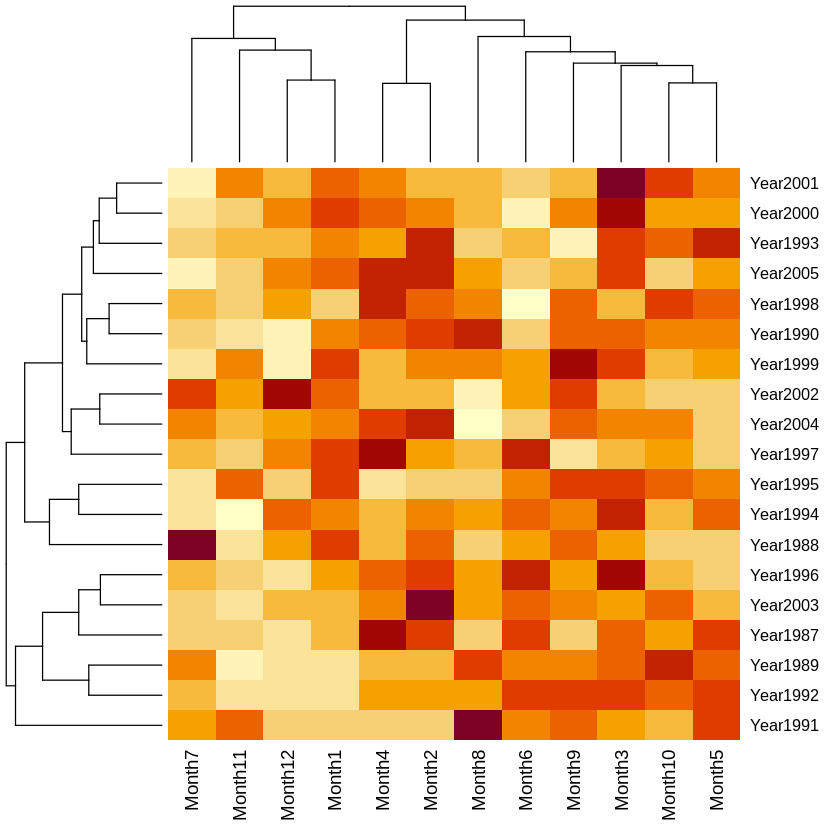

In [26]:
# this one may be convenient for a heat map, for example
aux<-copy(wide_report)
rownames(aux)<-aux$year
aux$year<-NULL
colnames(aux)<-paste0('Month',colnames(aux))
rownames(aux)<-paste0('Year',rownames(aux))
heatmap(as.matrix(aux), labRow = rownames(aux))

In [27]:
# Now from wide to long format again, using melt
long_report<-melt(wide_report, id.vars = c("year"),
                measure.vars = setdiff(colnames(wide_report),'year'),
                variable.name = "my_month", value.name = "no2")
head(long_report)

year,my_month,no2
<dbl>,<fct>,<dbl>
1987,1,38.06142
1988,1,52.10000
1989,1,33.18445
1990,1,41.35304
1991,1,32.63658
1992,1,30.79708


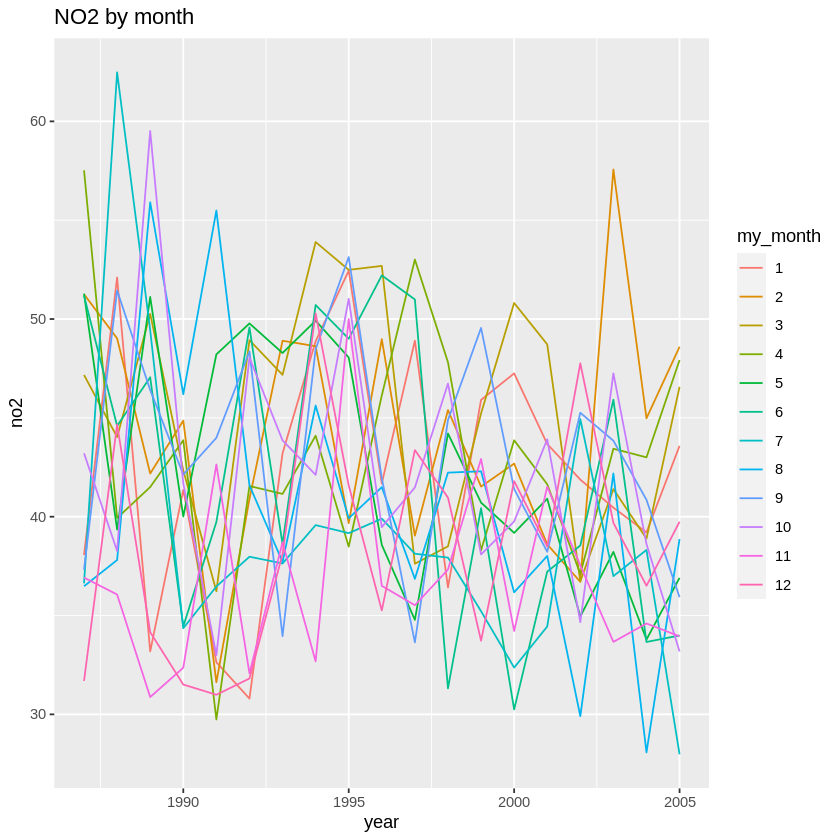

In [28]:
# Long shape allows us to plot in this case
library(ggplot2)
ggplot(data=long_report, aes(x=year, y=no2, group=my_month))+
        geom_line(aes(color=my_month))+ ggtitle('NO2 by month')

In [29]:
# long shape is also typically more useful to model or to operate by groups
long_report[,.(avg_no2=mean(no2)),by=.(my_month)]

my_month,avg_no2
<fct>,<dbl>
1,42.19058
2,44.26882
3,45.24563
4,43.16232
5,42.53812
6,42.07517
7,38.94379
8,40.67479
9,43.19788
